# Weather vs. Latitude
## Data retrieved 9-27-2019
----

### Analysis
* Temperature increases as one approaches the equator (latitude 0).  There is a large number of cities in the nothern hemisphere that are colder than the temperature range seen in the southern hemisphere.
* Humidity ranges from 40% to 100% in a narrow window (-5, 5) near the equator.  Outside of this window, we see much more variation in humidity percents.  In the northern hemisphere, humidities range from just above 0% to 100%.  In the southern hemisphere, humidities also range from 0% to 100%.
* There is not a relationship between latitude and wind speed.
* Cloudiness does not appear to depend on latitude.  There are noticeable bands of cities with cloudiness at 0%, 20%, 40%, 75% and 90%.
* The final plot given is the most informative.  Latitude is cut into 5 categories by quantile.  We see kernel density estimates of the variables within each latitude cut.  Notice that the distributions for maximum temperature have different centers, spreads, and shapes depending on the latitude cut.  This is also true for humidity and cloudiness.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import seaborn as sns

# Used to 
from datetime import datetime 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("", "output_data", "cities-09-27-2019.csv")
OUTPUT_PLOT_PATH = os.path.join("", "output_data")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#### Openweathermap api restricted to 60 calls per minute.  Breakup data and perform timing breaks
# to prevent exceeding 60 calls per minute

def get_weather_results(cities, chunk_size = 50, units = "imperial"):
    
    SUCCESSFUL_API_CALL = 200 # Successful API code 
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Helper function 
    def print_separator(what="-", length=40):
        print(what*length)
    
    # Split the list of cities into lists of size 
    #num_chunks = (len(cities) + chunk_size - 1) // chunk_size
    #city_chunks = np.array_split(cities, num_chunks)
    city_chunks = [cities[i:i+chunk_size] for i in range(0, len(cities), chunk_size)]
    
    weather_results = []

    print("Beginning Data Retrieval")
    print_separator()
    
    chunk_number = 1
    for chunk in city_chunks:
        city_number = 1
        for city in chunk:
        
            # Build query URL and request your results in requested units
            query_url = f"{url}appid={api_key}&q={city}&units={units}"

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
        
            if weather_json['cod'] == SUCCESSFUL_API_CALL:
                print(f"Processing Record {city_number} of Set {chunk_number} | {city}")
                weather_results.append({'City' : city,\
                                        'Cloudiness' : weather_json['clouds']['all'],\
                                        'Country' : weather_json['sys']['country'],\
                                        'Date' : weather_json['dt'],\
                                        'Humidity' : weather_json['main']['humidity'],\
                                        'Lat' : weather_json['coord']['lat'],\
                                        'Lng' : weather_json['coord']['lon'],\
                                        'Max Temp' : weather_json['main']['temp_max'],\
                                        'Wind Speed' : weather_json['wind']['speed']})
            else:
                print(f"{weather_json['message'].capitalize()}.  Skipping...")
                      
            # Add a 60/chunk_size second interval between queries to stay within API query limits
            time.sleep(60/chunk_size)
                  
            city_number += 1
        chunk_number += 1
    
    print_separator()
    print("Data Retrieval Complete")                  
    print_separator()
    
    return weather_results

# Get the results
weather_results = get_weather_results(cities)


Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | huarmey
City not found.  Skipping...
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | barra dos coqueiros
Processing Record 9 of Set 1 | zyryanka
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | port hardy
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | port blair
City not found.  Skipping...
Processing Record 21 of Set 1 | cortez
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | provideniya
Proc

City not found.  Skipping...
City not found.  Skipping...
Processing Record 8 of Set 5 | grand gaube
Processing Record 9 of Set 5 | atar
Processing Record 10 of Set 5 | bitung
Processing Record 11 of Set 5 | tyssedal
Processing Record 12 of Set 5 | narsaq
Processing Record 13 of Set 5 | souillac
Processing Record 14 of Set 5 | kahului
Processing Record 15 of Set 5 | longyearbyen
Processing Record 16 of Set 5 | laguna
Processing Record 17 of Set 5 | mayo
Processing Record 18 of Set 5 | havoysund
Processing Record 19 of Set 5 | camopi
Processing Record 20 of Set 5 | santiago
Processing Record 21 of Set 5 | ust-tsilma
Processing Record 22 of Set 5 | ilulissat
City not found.  Skipping...
Processing Record 24 of Set 5 | lahaina
City not found.  Skipping...
Processing Record 26 of Set 5 | benghazi
Processing Record 27 of Set 5 | axim
City not found.  Skipping...
Processing Record 29 of Set 5 | saint george
Processing Record 30 of Set 5 | arlit
Processing Record 31 of Set 5 | rocha
City not 

City not found.  Skipping...
Processing Record 16 of Set 9 | ouesso
Processing Record 17 of Set 9 | hobyo
Processing Record 18 of Set 9 | san miguel
Processing Record 19 of Set 9 | osypenko
Processing Record 20 of Set 9 | pero pinheiro
Processing Record 21 of Set 9 | shingu
Processing Record 22 of Set 9 | sampit
Processing Record 23 of Set 9 | singapore
Processing Record 24 of Set 9 | cape coast
Processing Record 25 of Set 9 | yulara
City not found.  Skipping...
Processing Record 27 of Set 9 | hirara
Processing Record 28 of Set 9 | tupiza
Processing Record 29 of Set 9 | sawakin
Processing Record 30 of Set 9 | biak
Processing Record 31 of Set 9 | touros
Processing Record 32 of Set 9 | laurel
Processing Record 33 of Set 9 | leh
Processing Record 34 of Set 9 | gairo
Processing Record 35 of Set 9 | manacapuru
Processing Record 36 of Set 9 | puerto carreno
Processing Record 37 of Set 9 | dalvik
Processing Record 38 of Set 9 | metro
City not found.  Skipping...
Processing Record 40 of Set 9 

### Convert Raw Data to DataFrame

In [5]:
weather_df = pd.DataFrame(weather_results)

In [6]:
# The index is not needed in the csv file since it is just 0, 1, ...
weather_df.to_csv(output_data_file, index=False)

In [2]:
# When coming back to the problem, it is not necessary to
# run each API call again - just read in our CSV file:
weather_df = pd.read_csv(output_data_file)

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,29,PF,1569609548,73,-23.12,-134.97,72.63,10.83
1,new norfolk,75,AU,1569609550,96,-42.78,147.06,39.99,3.36
2,huarmey,100,PE,1569609551,90,-10.07,-78.15,61.47,8.46
3,avarua,100,CK,1569609513,83,-21.21,-159.78,71.60,2.24
4,comodoro rivadavia,0,AR,1569609555,43,-45.87,-67.48,73.40,2.24


### Summary plots
I have a generic function below which can be used to generate all of the plots.  We print the date the data was retrieved using the `datetime` module.

In [8]:
# A function to perform the plotting.

def plot_weather_data(df, x, y, xlabel="", ylabel="", title="", filename=None):
    """Produce scatter plots for the weather data.
    
    Args:
        df: a pandas dataframe
        x: a column name in a pandas dataframe for plotting on x-axis
        y: a column name in a pandas dataframe for plotting on y-axis
        xlabel: the x-axis label
        ylabel: the y-axis label
        title: the title to produce on the plot
        filename: filename for saving .png file.  If `None`, no file is saved.
        **kwargs: addtional plot parameters passed to matplotlib.pyplot.scatter
    """
    # Function required matplotlib.pyplot being imported as plt
    
    ax = sns.lmplot(x=x, y=y, lowess=True, data=df)
    #plt.scatter(df[x], df[y], **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if filename is not None:
        plt.savefig(filename)
    plt.show()

# For the plot titles, get the date the data was retrived:
# from datetime import datetime
ts = weather_df.loc[0, 'Date'] #openweathmap api returns GMT unix timestamp
retrieval_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')
filename_date = datetime.utcfromtimestamp(ts).strftime('%m-%d-%Y')

#### Latitude vs. Temperature Plot

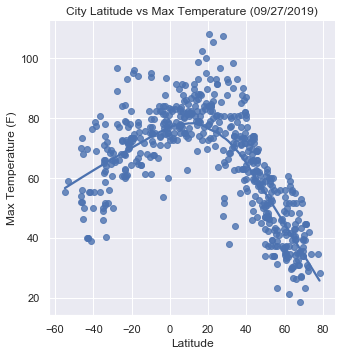

In [9]:
# Using the function, retrieval_date, and plot_options defined above
sns.set()
plot_weather_data(weather_df, 'Lat', 'Max Temp',\
                 xlabel="Latitude", ylabel="Max Temperature (F)",\
                 title=f"City Latitude vs Max Temperature ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, f"maxtemp-{filename_date}.png"))


#### Latitude vs. Humidity Plot

In [10]:
# Check if there are observations with Humidity greater than 100
sum(weather_df.Humidity > 100)

0

In [11]:
# Which observations?
weather_df[weather_df.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [12]:
# Work with the observations that have humidity less than or equal to 100%
sub_df = weather_df.loc[weather_df.Humidity <= 100, :]
sub_df.shape

(544, 9)

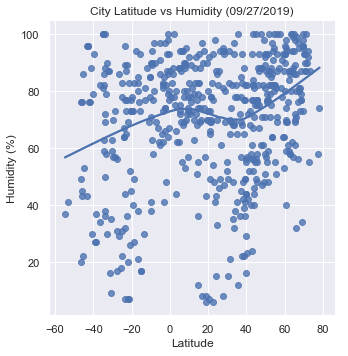

In [13]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(sub_df, 'Lat', 'Humidity',\
                 xlabel="Latitude", ylabel="Humidity (%)",\
                 title=f"City Latitude vs Humidity ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, f"humidity-{filename_date}.png"))


#### Latitude vs. Cloudiness Plot

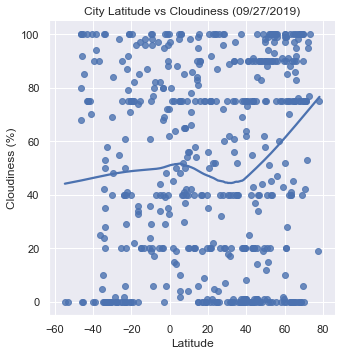

In [14]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Cloudiness',\
                 xlabel="Latitude", ylabel="Cloudiness (%)",\
                 title=f"City Latitude vs Cloudiness ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, f"cloudiness-{filename_date}.png"))


#### Latitude vs. Wind Speed Plot

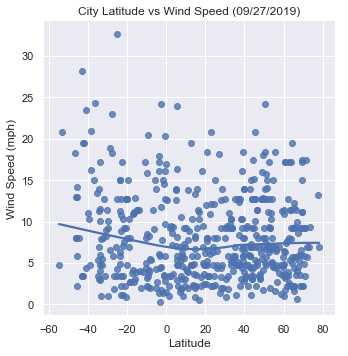

In [15]:
# Using the function, retrieval_date, and plot_options defined above
plot_weather_data(weather_df, 'Lat', 'Wind Speed',\
                 xlabel="Latitude", ylabel="Wind Speed (mph)",\
                 title=f"City Latitude vs Wind Speed ({retrieval_date})",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, f"windspeed-{filename_date}.png"))


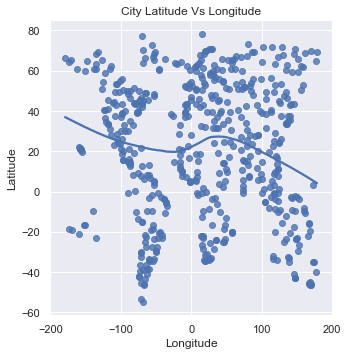

In [16]:
# For fun - the latitude and longitude locations of our cities.
plot_weather_data(weather_df, 'Lng', 'Lat',\
                 xlabel="Longitude", ylabel="Latitude",\
                 title="City Latitude Vs Longitude",\
                 filename=os.path.join("", OUTPUT_PLOT_PATH, f"cities-{filename_date}.png"))


C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


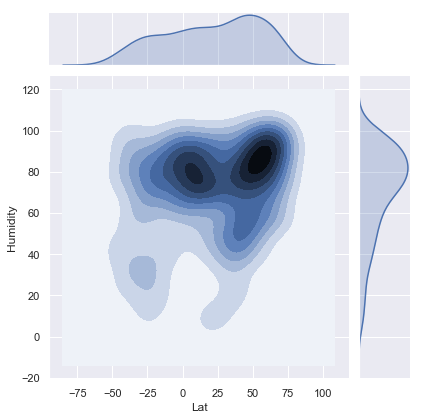

In [17]:
sns.jointplot("Lat", "Humidity", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, f"humidity-joint-{filename_date}.png"))

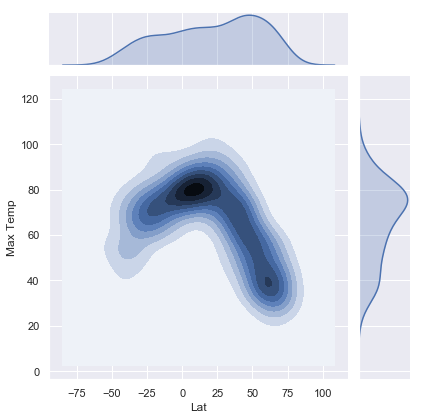

In [18]:
sns.jointplot("Lat", "Max Temp", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, f"temp-joint-{filename_date}.png"))

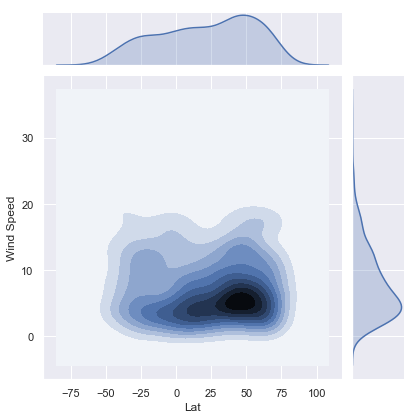

In [19]:
sns.jointplot("Lat", "Wind Speed", kind="kde", data=sub_df)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, f"wind-joint-{filename_date}.png"))

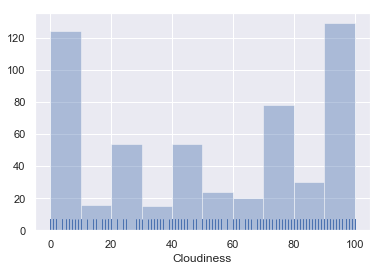

In [20]:
sns.distplot(weather_df.Cloudiness, bins=10, kde=False, hist=True, rug=True)
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, f"cloudhist-{filename_date}.png"))

In [21]:
# Divide latitudes into 5 categories based on quantiles
latc = pd.qcut(sub_df['Lat'], 5)
sub_df['Lats'] = latc
sub_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Lats
0,rikitea,29,PF,1569609548,73,-23.12,-134.97,72.63,10.83,"(-54.811, -14.99]"
1,new norfolk,75,AU,1569609550,96,-42.78,147.06,39.99,3.36,"(-54.811, -14.99]"
2,huarmey,100,PE,1569609551,90,-10.07,-78.15,61.47,8.46,"(-14.99, 13.22]"
3,avarua,100,CK,1569609513,83,-21.21,-159.78,71.60,2.24,"(-54.811, -14.99]"
4,comodoro rivadavia,0,AR,1569609555,43,-45.87,-67.48,73.40,2.24,"(-54.811, -14.99]"


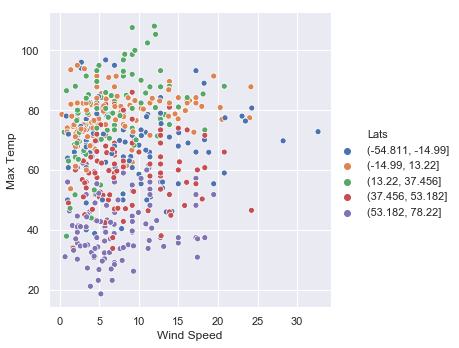

In [22]:
sns.relplot("Wind Speed", "Max Temp", hue="Lats", data=sub_df)

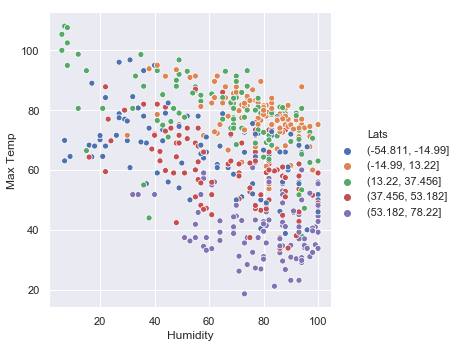

In [23]:
sns.relplot("Humidity", "Max Temp", hue="Lats", data=sub_df)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


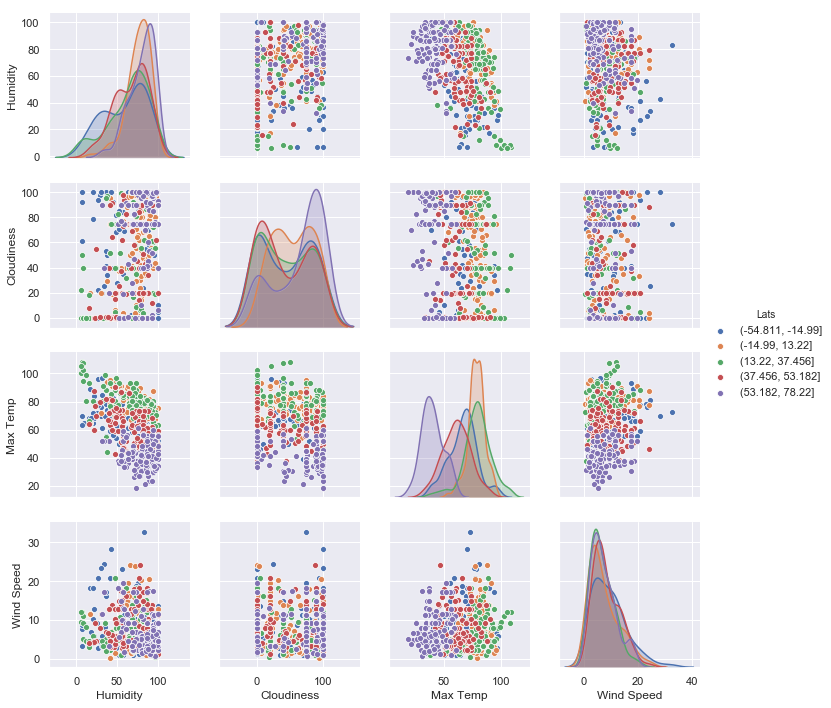

In [24]:
sns.pairplot(sub_df, vars=["Humidity", "Cloudiness", "Max Temp", "Wind Speed"], hue="Lats")
plt.savefig(os.path.join("", OUTPUT_PLOT_PATH, f"pairs-{filename_date}.png"))